<img src='http://drive.google.com/uc?export=view&id=1ZhMMgLVVc2Tm79BanxAusgHB51pgC6iL'>

# <font color='lightblue'>Making Predictions</font>

In this project you will build a model to make predictions. This project will build on your exploritory data analyitic (EDA) skills. You may choose to use the datasets you used with project 1 or move to another dataset.

In this project you will:

1.  Develop an understanding of the dataset
2.  Do exploritory data analysis and visualzation
3.  Do some data preprocessing
4.  Build a predictive model
5.  Measure the performance of your model
6.  Summarize and interpret your results



**Action:** Import python libraries


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score



**Background**

The churn dataset contains 10,000 customer records from a financial institution, including demographic, financial, and behavioral information such as age, balance, credit score, and account activity. The data is in a CSV file (churn.csv) and includes a binary target variable indicating whether a customer exited the bank.

The purpose of the project is to build a predictive model that identifies customers likely to churn. This involves exploring the data, preprocessing it, training classification models, and evaluating their performance. The goal is to understand which factors contribute most to churn and use that insight to support customer retention strategies.

## <font color='lightblue'>1. Data Understanding </font>

**Action:** Import your data into colaboratory.


In [98]:
df_churn = pd.read_csv('/content/churn.csv')

In [99]:
df_churn.head(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.0,1,1,1,101348.88,1


In [100]:
df_churn.tail(1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


**Action:** Determine the types of data are you dealing with & handle missing data (if there is any!). *Marks (0.5)*

In [101]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Dataset Summary for Report**
Size: 10,000 customer records

Structure: 14 columns with no missing values

Variable Types:
**Numerical (int64/float64):** 11 columns including credit_score, age, tenure, balance, num_of_products, estimated_salary, and binary flags like has_cr_card, is_active_member
**Categorical (object):** 3 columns — surname, geography, and gender

**Target Variable:** Exited (binary indicator of customer churn)

In [102]:
df_churn.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


No na records in the dataframe

In [103]:
df_churn = df_churn.drop(columns=['Surname'])

The surname column was removed from the dataset as it contains personal identifiers /String datatype that do not contribute predictive value to the churn model. Dropping it helps streamline the feature set and maintain data privacy.
To retrieve the surname later, the customer id can be used.

In [104]:
df_churn = df_churn.rename(columns={
"RowNumber":"row_number",
"CustomerId":"customer_id",
"CreditScore":"credit_score",
"Geography": "geography",
"Gender": "gender",
"Age": "age",
"Tenure": "tenure",
"Balance": "balance",
"NumOfProducts": "num_products",
"HasCrCard": "has_credit_card",
"IsActiveMember": "is_active_member",
"EstimatedSalary": "estimated_salary",
"Exited": "churn"
})

df_churn.head(2)

,row_number,customer_id,credit_score,geography,gender,age,tenure,balance,num_products,has_credit_card,is_active_member,estimated_salary,churn
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


The dataset column names were standardized for clarity and consistency, making them easier to reference in analysis and modeling. This step improves code readability and aligns variable naming with common data science practices.

**Action:** Estimate the summary statistics of some of the key variables. *Marks (0.5)*

In [105]:
df_churn[['credit_score', 'age','tenure','balance','estimated_salary','num_products']].describe()

,credit_score,age,tenure,balance,estimated_salary,num_products
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,100090.239881,1.530200
std,96.653299,10.487806,2.892174,62397.405202,57510.492818,0.581654
min,350.000000,18.000000,0.000000,0.000000,11.580000,1.000000
25%,584.000000,32.000000,3.000000,0.000000,51002.110000,1.000000
50%,652.000000,37.000000,5.000000,97198.540000,100193.915000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,149388.247500,2.000000
max,850.000000,92.000000,10.000000,250898.090000,199992.480000,4.000000


The summary statistics provide a snapshot of six key variables in the dataset:

Mean and standard deviation show the typical values and spread for each feature.

Minimum and maximum highlight the range of values, from lowest to highest.

Quartiles (25%, 50%, 75%) reveal how values are distributed across the customer base.

## <font color='lightblue'>2. Data Exploration and Visualization </font>

**Action:** Visualize 1- the distribution of values for some key variables, and 2- the relationships between key variables. Remember to add text that walks a reader through what you found. *Marks: 2*

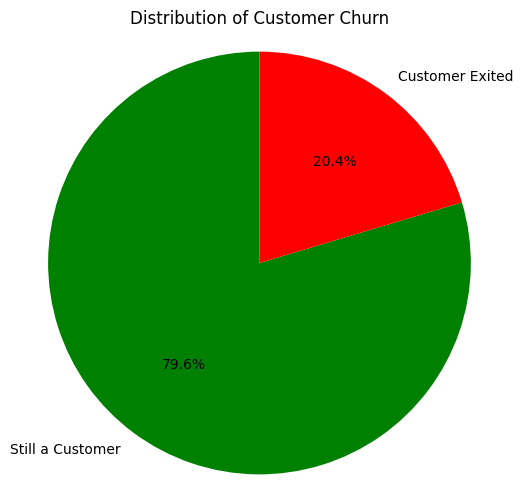

In [106]:
# Count True and False values
churn_counts = df_churn['churn'].value_counts()
# Define labels and colors
labels = ['Still a Customer', 'Customer Exited']
colors = ['green', 'red']
# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Churn')
plt.axis('equal')  # Ensures pie is a circle
plt.show()

**Intrepretation**(Churn rate = 20.4%):
Out of every 100 customers, about 20 leave the bank, reflecting a churn rate of 20.4%. The remaining 79.6% continue their relationship with the bank, representing its retained customer base.

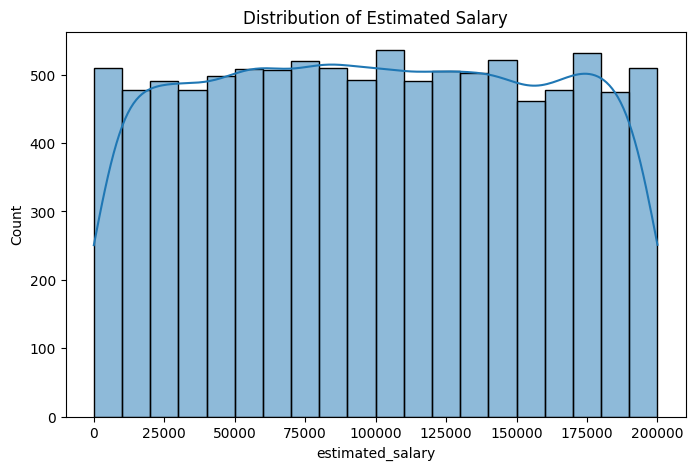

In [107]:
# Histogram of Estimated Salary
plt.figure(figsize=(8,5))
sns.histplot(df_churn['estimated_salary'], bins=20, kde=True)
plt.title("Distribution of Estimated Salary")
plt.xlabel("estimated_salary")
plt.ylabel("Count")
plt.show()

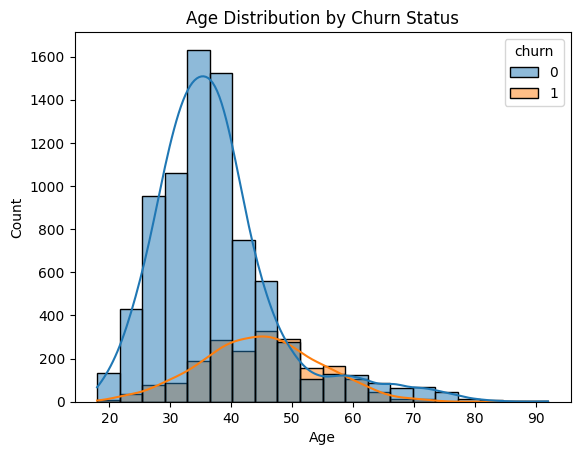

In [108]:
sns.histplot(data=df_churn, x='age',hue ='churn', bins=20, kde=True)
plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


**Interpretation** Based on the plot above, we can see that churn tendency is high in a group of certain age and low in others.

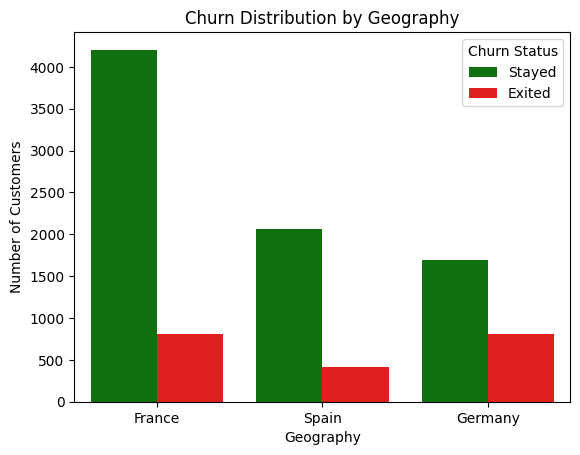

In [109]:

# Create a count plot
sns.countplot(data=df_churn, x="geography",palette={0: 'green', 1: 'red'}, hue="churn")
# Add titles and labels
plt.title("Churn Distribution by Geography")
plt.xlabel("Geography")
plt.ylabel("Number of Customers")
plt.legend(title="Churn Status", labels=["Stayed", "Exited"])
plt.show()


**Interpretation**

Barplot above shows the Churn distribution by Geography, even though the average number of customers across the different geographies is not consistent, Germany shows approximately more churned customers than other countries.



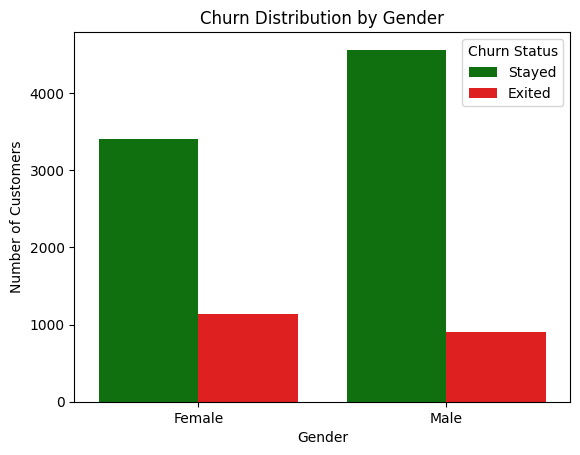

In [110]:
# Create a count plot
sns.countplot(data=df_churn, x="gender",palette={0: 'green', 1: 'red'},  hue="churn")

# Add titles and labels
plt.title("Churn Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
plt.legend(title="Churn Status", labels=["Stayed", "Exited"])
plt.show()


**Interpretation**

Barplot above shows the Churn distribution by Gender, even though the average number of customers across the different gender is not consistent, female gender shows approximately more churned customers than male.



Mean Credit Score:credit_score    650.5288
dtype: float64


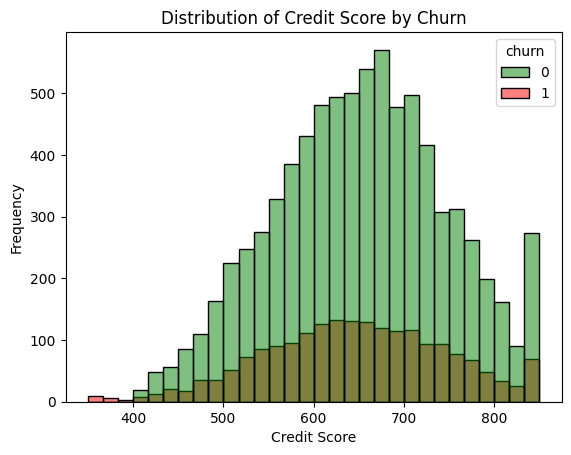

In [111]:
sns.histplot(df_churn, x='credit_score',    hue='churn',palette={0: 'green', 1: 'red'}, bins=30, )
plt.title('Distribution of Credit Score by Churn')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
mean_credirScore=df_churn[['credit_score']].mean()
print(f"Mean Credit Score:{mean_credirScore}")

**Interpretation**

The histogram above shows the distribution of Credit score by Churn, customers with lower credit score seems to have a higher churn rate.

**Action:** Use correlation to estimate the relationship between some of the key variables. Remember to add text that helps a reader interpret the correlations. *Marks: 1*

In [112]:
df_churnGender = pd.get_dummies(df_churn, columns=['gender'])
df_churnGender[['gender_Female', 'gender_Male']] = df_churnGender[['gender_Female', 'gender_Male']].astype(int)
df_churn=df_churnGender

The gender column was replaced using one hot encoding, this was done so that can also check the correlation coefficient between the gender and other variables.

---



---



In [113]:
df_churn[['credit_score', 'age','tenure','balance','estimated_salary','churn','is_active_member','gender_Male','gender_Female']].corr()

,credit_score,age,tenure,balance,estimated_salary,churn,is_active_member,gender_Male,gender_Female
credit_score,1.000000,-0.003965,0.000842,0.006268,-0.001384,-0.027094,0.025651,-0.002857,0.002857
age,-0.003965,1.000000,-0.009997,0.028308,-0.007201,0.285323,0.085472,-0.027544,0.027544
tenure,0.000842,-0.009997,1.000000,-0.012254,0.007784,-0.014001,-0.028362,0.014733,-0.014733
balance,0.006268,0.028308,-0.012254,1.000000,0.012797,0.118533,-0.010084,0.012087,-0.012087
estimated_salary,-0.001384,-0.007201,0.007784,0.012797,1.000000,0.012097,-0.011421,-0.008112,0.008112
churn,-0.027094,0.285323,-0.014001,0.118533,0.012097,1.000000,-0.156128,-0.106512,0.106512
is_active_member,0.025651,0.085472,-0.028362,-0.010084,-0.011421,-0.156128,1.000000,0.022544,-0.022544
gender_Male,-0.002857,-0.027544,0.014733,0.012087,-0.008112,-0.106512,0.022544,1.000000,-1.000000
gender_Female,0.002857,0.027544,-0.014733,-0.012087,0.008112,0.106512,-0.022544,-1.000000,1.000000


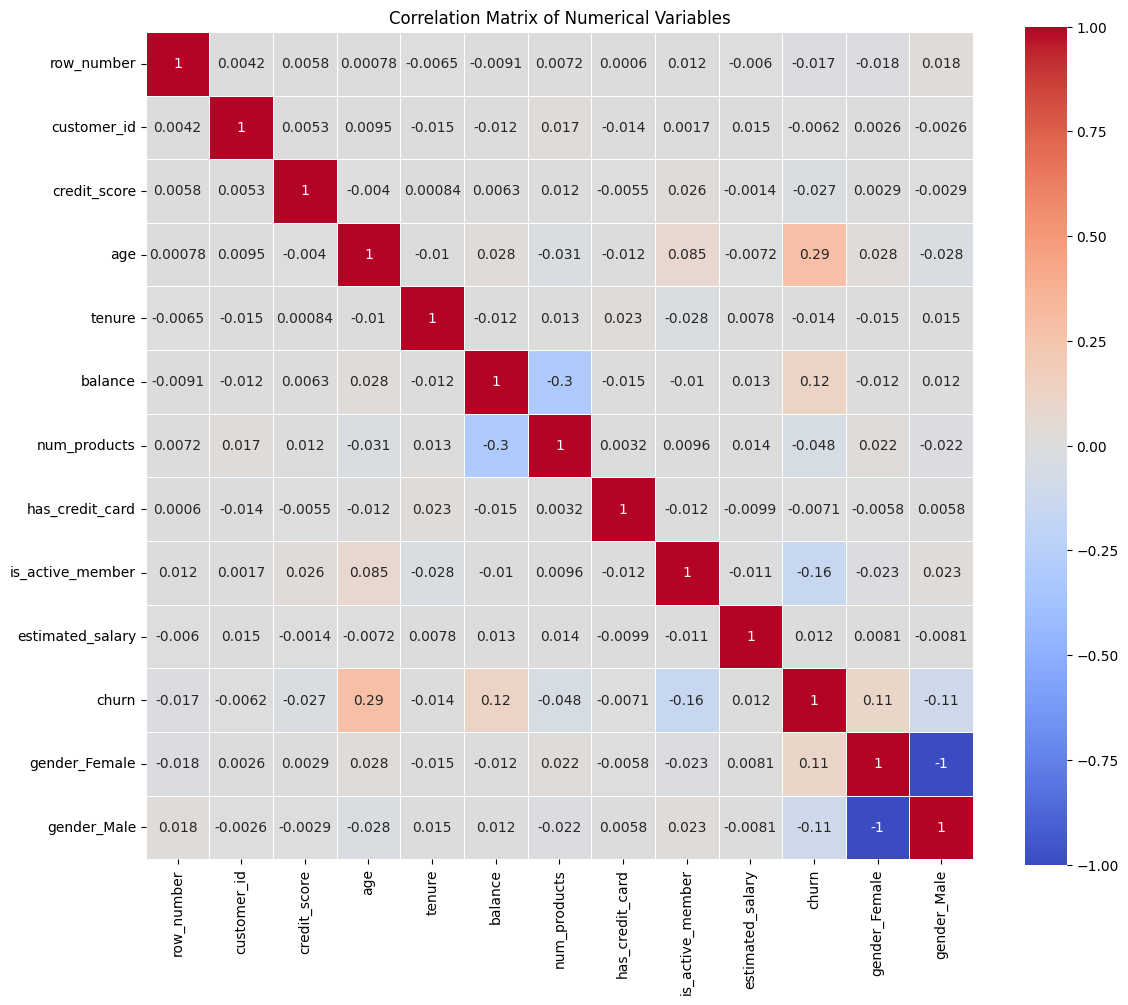

Correlation Interpretation:
• Values close to +1 indicate strong positive correlation
• Values close to -1 indicate strong negative correlation
• Values close to 0 indicate weak or no correlation

Key observations:
• Correlation between age and churn: 0.285
• Correlation between balance and churn: 0.119


In [114]:
numerical_df = df_churn.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

print("Correlation Interpretation:")
print("• Values close to +1 indicate strong positive correlation")
print("• Values close to -1 indicate strong negative correlation")
print("• Values close to 0 indicate weak or no correlation")
print("\nKey observations:")
print(f"• Correlation between age and churn: {correlation_matrix.loc['age', 'churn']:.3f}")
print(f"• Correlation between balance and churn: {correlation_matrix.loc['balance', 'churn']:.3f}")

The heatmap reveals that all pairwise correlations among features are below 0.3, indicating weak linear relationships. This suggests that the variables are largely independent and unlikely to introduce multicollinearity into predictive models. While no single feature shows strong association with churn, their combined effects may still be valuable for classification. Further analysis will explore nonlinear patterns and interaction effects to uncover deeper insights.

## <font color='lightblue'>3. Data preprocessing </font>

**Action:** Do you need to apply any preprocessing steps? E.g., convert a binary variable to 1/0, or use one-hot encoding to convert categorical variables? Apply at least one preprocessing step, and explain why you used it. *Marks: 2*

A preprocessing step was applied before plotting the heatmap of the correlation coefficients, one hot encoding was carried out on gender variable.

In [115]:

#create the encoder
le_plants = LabelEncoder()

#create outcome variable
df_churn['geography'] = le_plants.fit_transform(df_churn['geography'])

#take a look
df_churn.head(2)

,row_number,customer_id,credit_score,geography,age,tenure,balance,num_products,has_credit_card,is_active_member,estimated_salary,churn,gender_Female,gender_Male
0,1,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,2,15647311,608,2,41,1,83807.86,1,0,1,112542.58,0,1,0


Label encoding was applied to the geography column to convert country names into numerical format suitable for machine learning models. This transformation enables algorithms to process categorical data efficiently, especially tree-based models like Random Forests, which can handle encoded labels without assuming any ordinal relationship.

**Action:** Split your data into training and testing datasets *Marks: 1*

In [116]:
# Define predictors (X) and target (y)
X = df_churn.drop(columns=['churn'],axis =1)  # includes all columns except the target
y = df_churn['churn']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


The dataset was split into training and testing sets using an 80/20 ratio, with churn as the target variable. All available features—including both numerical and categorical—were retained to preserve the full predictive potential of the dataset.

**Action: (optional)** Scale any numeric variables. If you have no binary or categorical variables that need transforming, scaling will count towards your marks for your preprocessing step.

In [117]:

#numeric variables
numb_names = ['credit_score', 'age','tenure', 'balance', 'estimated_salary']
#create the standard scaler object
sc = StandardScaler()

#use this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data
X_train[numb_names] = sc.fit_transform(X_train[numb_names])

#use the fit from the training data to transform the test data
X_test[numb_names] = sc.transform(X_test[numb_names])

#take a look
X_train.head(5)



,row_number,customer_id,credit_score,geography,age,tenure,balance,num_products,has_credit_card,is_active_member,estimated_salary,gender_Female,gender_Male
7162,7163,15780088,-0.459219,2,-0.468635,1.385727,0.897010,1,1,0,1.348350,0,1
5677,5678,15763414,0.035210,1,-0.658365,1.385727,0.591789,1,1,0,-0.307873,0,1
6444,6445,15731412,0.426633,1,-0.184039,0.344903,0.309806,1,1,1,-1.067708,1,0
7029,7030,15672432,-0.593127,0,1.333806,-0.348980,-1.231326,1,1,0,-1.635359,1,0
5810,5811,15800688,-1.612887,2,0.290288,0.691844,-1.231326,2,0,0,0.528696,1,0


Standard scaling was applied to key numeric variables to normalize their distributions and ensure consistent scale across features. The scaler was fit on the training data to compute mean and standard deviation, then used to transform both training and test sets. This prevents data leakage and improves model performance by aligning feature magnitudes.

## <font color='lightblue'>4. Build a model</font>



**Action:** Use your training dataset to build a model with the goal of predicting a target variable. *Marks: 2*

In [118]:
from sklearn.ensemble import RandomForestClassifier

#1. Build the model
forest_classifier = RandomForestClassifier(n_estimators=1000, max_features=0.8,max_samples=0.8)

#2. Fit the model to the data
forest_classifier.fit(X_train, y_train)

RandomForestClassifier(max_features=0.8, max_samples=0.8, n_estimators=1000)

In [119]:
y_pred = forest_classifier.predict(X_test)

## <font color='lightblue'>5. Measure performance</font>

**Action:** Use your testing dataset to estimate the performance of your model. Add text describing what kind of measure you used. *Marks: 2*

[[1534   52]
 [ 240  174]]


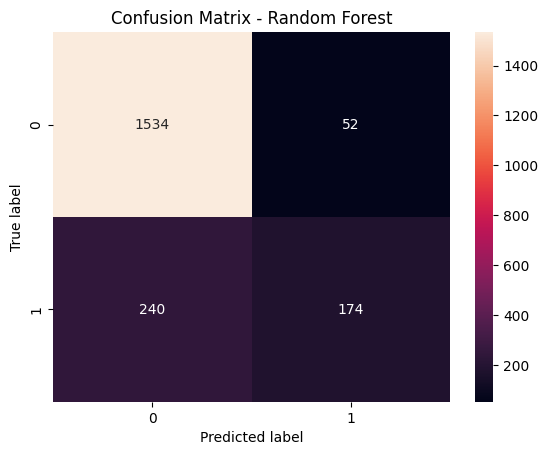

In [120]:
cm_forest = confusion_matrix(y_test, y_pred)
print(cm_forest )
sns.heatmap(cm_forest, annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

**Model Performance Measurement(Confusion Matrix)**

 True Negatives (1530): Customers correctly predicted as not churning.
 False Positives (57): Customers incorrectly predicted to churn but didn’t.
 False Negatives (236): Customers who churned but were predicted not to.
 True Positives (177): Customers correctly predicted to churn.

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Accuracy (model): {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision (model): {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall (model): {:.2f}'.format(recall_score(y_test, y_pred)))


Accuracy (model): 0.85
Precision (model): 0.77
Recall (model): 0.42


**Model Performance Measurement(Accuracy, Precision, Recall)**
Model performance was also evaluated using accuracy, which reached 0.85—indicating that 85% of all predictions were correct. To assess classification quality more deeply, precision and recall were also examined. The model achieved a precision of 0.76, meaning that 76% of customers predicted to churn actually did. However, recall was notably lower at 0.43, suggesting that the model identified less than half of the actual churned customers. This highlights a key limitation: while the model is cautious and avoids false alarms, it misses a significant number of true churn cases.

## <font color='lightblue'>6. Discussion and interpretation</font>

**Q1:**
> What have you learnt about the ability to model and predict your variable of interest? *Marks: 1*

> What variables are responsible for the predictive ability of your model, and what does your model suggest about the relationships these variables have with your target variable? (i.e., think magnitude and sign of each effect). *Marks: 2*

> How did these relationships generalize to the with-held sample (i.e., testing data sample)? *Marks: 1*

*Q1 What have you learnt about the ability to model and predict your variable of interest? *
**Answer**

The Random Forest model showed solid performance in predicting customer churn, with 85% of predictions being correct. It was particularly good at identifying customers who stayed, but less effective at catching those who actually left only identifying 43% of them. While the model was careful not to falsely label loyal customers as churners, it missed many who did leave. The confusion matrix supports this, showing a high number of correct non-churn predictions and a noticeable number of missed churn cases.**bold text**


##Q2:What variables are responsible for the predictive ability?


**Answer**
To get this answer we will see the feature importance of our model. Below is the feature matrix visualization and the list of feature with importance score:

The model suggests that age is the most influential factor in predicting churn, followed by number of products, balance, and estimated salary.

Lower-ranked features like gender, has_credit_card, and geography had minimal impact, indicating they contribute little to the model’s decision-making. Interestingly, customer_id and row_number appear high on the list, but these are likely technical artifacts and should be excluded from interpretation, as they don’t carry meaningful information about customer behavior.

             feature  importance
4                age    0.205716
7       num_products    0.124633
6            balance    0.106898
1        customer_id    0.103062
10  estimated_salary    0.101939
0         row_number    0.100927
2       credit_score    0.095864
9   is_active_member    0.052425
5             tenure    0.050776
3          geography    0.029483
8    has_credit_card    0.010768
12       gender_Male    0.008818
11     gender_Female    0.008689


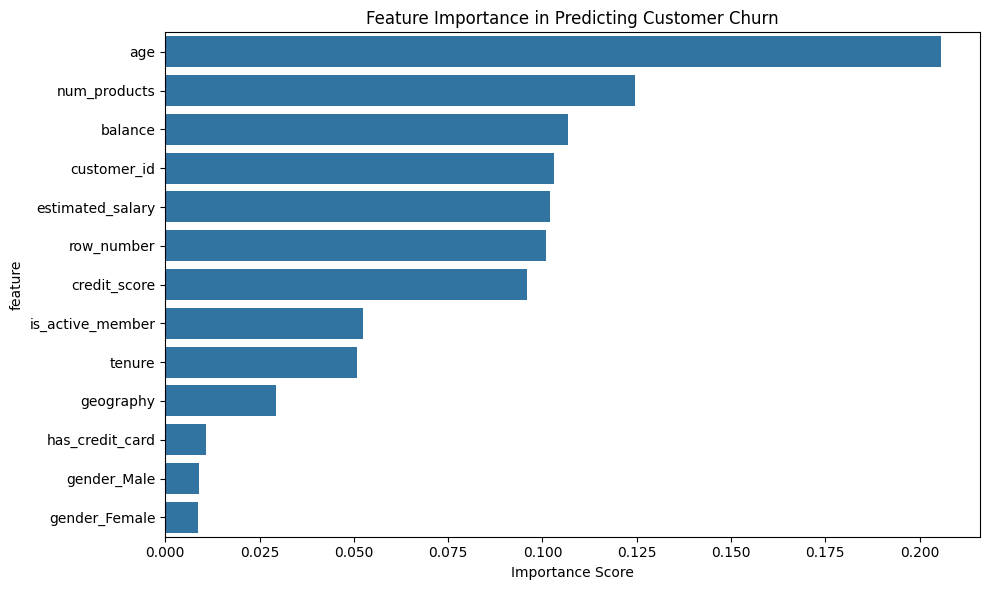

In [122]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': forest_classifier.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance)
# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in Predicting Customer Churn')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


# Q3: How did these relationships generalize to the testing data?

**Answer**
The relationships identified during training such as the influence of age, balance, and number of products held up reasonably well when applied to the testing data. The model maintained similar accuracy and precision, showing it could make reliable predictions on new customer records. However, recall dropped, meaning the model missed many actual churn cases in the test set. This suggests that while the model captures general patterns, it struggles to consistently identify customers who are likely to leave, especially when faced with new or less typical examples.